# Analysis of processes
Monitoring the processes, we have access to 3 metrics : CPU utilization, CPU memory, GPU memory.

In [2]:
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn.objects as so
from seaborn import axes_style
theme_dict = {**axes_style("whitegrid"), "grid.linestyle": ":"}
so.Plot.config.theme.update(theme_dict)
import os
import pandas as pd
import sys

# fl_repo = '/Users/mathildepro/Documents/code_projects/FL-G5K-EnergyConsumption'
fl_repo = '/home/mjay/FL-G5K-Test'
# logs = '/Users/mathildepro/Documents/code_projects/fl_logs/'
logs = '/home/mjay/energyfl/outputcifar10'

sys.path.append(f'{fl_repo}/src/utils')

In [3]:
outputs_path = [
    f"{logs}/fedyogi/labelskew",
    f"{logs}/fedavg/labelskew",
    f"{logs}/fedadam/labelskew",
    f"{logs}/fedadagrad/labelskew"
]
path_to_output = outputs_path[0]
summary_path = os.path.join(path_to_output,"experiment_summary.csv")

summaryfile = pd.read_csv(
        summary_path, 
        parse_dates=[
            "timestamps.end_experiment_after_sleep", 
            "timestamps.end_experiment", 
            "timestamps.start_experiment", 
            "timestamps.start_experiment_before_sleep"
            ],
        date_format='%Y-%m-%d_%H:%M:%S_%f')
summaryfile["result_folder_base"] = path_to_output
summaryfile["result_folder"] = summaryfile["result_folder_base"] + "/" + summaryfile["result_folder"].apply(lambda x: x.split("/")[-1])
summaryfile["result_folder"].values


array(['/home/mjay/energyfl/outputcifar10/fedyogi/labelskew/2024-02-29_17-52-05',
       '/home/mjay/energyfl/outputcifar10/fedyogi/labelskew/2024-02-29_19-03-38',
       '/home/mjay/energyfl/outputcifar10/fedyogi/labelskew/2024-03-01_03-11-35',
       '/home/mjay/energyfl/outputcifar10/fedyogi/labelskew/2024-03-01_11-08-10',
       '/home/mjay/energyfl/outputcifar10/fedyogi/labelskew/2024-03-01_11-33-51',
       '/home/mjay/energyfl/outputcifar10/fedyogi/labelskew/2024-03-01_14-22-02',
       '/home/mjay/energyfl/outputcifar10/fedyogi/labelskew/2024-03-01_19-45-20'],
      dtype=object)

In [4]:
energy = pd.read_csv(summaryfile["result_folder"].values[0] + "/client_host_4/energy.csv")

In [5]:
proc = pd.read_csv(summaryfile["result_folder"].values[0] + "/client_host_4/processes.csv")
proc.head()

,timestamp,process_name,process_id,cpu_util(%),mem,GPU_mem,state
0,2024-02-29 17:52:16.044469,nvargus-daemon,800,0.0002,1228,0,NaN
1,2024-02-29 17:52:17.016415,nvargus-daemon,800,0.0002,1228,0,NaN
2,2024-02-29 17:52:18.016208,nvargus-daemon,800,0.0002,1228,0,NaN
3,2024-02-29 17:52:19.016189,nvargus-daemon,800,0.0002,1228,0,NaN
4,2024-02-29 17:52:20.015088,nvargus-daemon,800,0.0002,1228,0,NaN


In [6]:
proc.groupby(["process_name"]).count()

,timestamp,process_id,cpu_util(%),mem,GPU_mem,state
process_name,,,,,,
nvargus-daemon,1780,1780,1780,1780,1780,0
python3,16996,16996,16996,16996,16996,0


In [7]:
proc[proc["process_name"]=="python3"].groupby(["process_id"]).count()

,timestamp,process_name,cpu_util(%),mem,GPU_mem,state
process_id,,,,,,
147850,1700,1700,1700,1700,1700,0
147854,1701,1701,1701,1701,1701,0
147874,1700,1700,1700,1700,1700,0
147899,1699,1699,1699,1699,1699,0
147912,1699,1699,1699,1699,1699,0
147930,1699,1699,1699,1699,1699,0
147932,1699,1699,1699,1699,1699,0
147937,1700,1700,1700,1700,1700,0
147939,1700,1700,1700,1700,1700,0


In [8]:
proc[proc["process_name"]=="python3"].groupby(["timestamp"])["cpu_util(%)"].agg({"mean", "count"})

,count,mean
timestamp,,
2024-02-29 17:53:09.114825,5,77.740225
2024-02-29 17:53:10.106762,10,76.869910
2024-02-29 17:53:11.213751,10,75.570778
2024-02-29 17:53:12.108136,10,75.575913
2024-02-29 17:53:13.057127,10,73.962843
...,...,...
2024-02-29 18:21:26.316826,10,3.655024
2024-02-29 18:21:27.272951,10,3.692039
2024-02-29 18:21:28.245044,10,3.730955


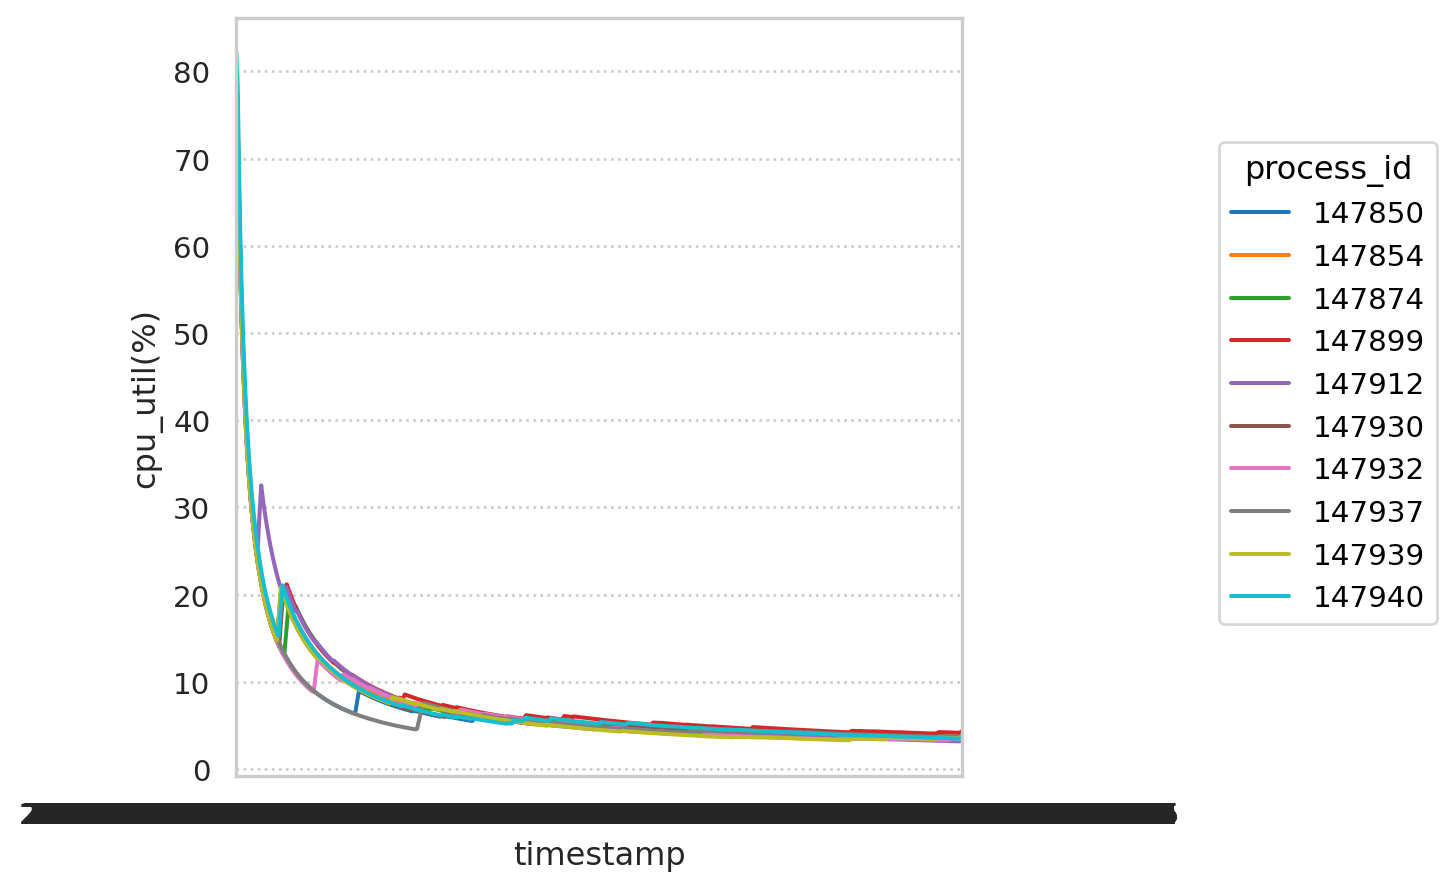

In [9]:
(
    so.Plot(
        proc[proc["process_name"]=="python3"], x="timestamp", y="cpu_util(%)",
        color="process_id",
    )
    .add(so.Line())
    .scale(
        color="tab10")
)

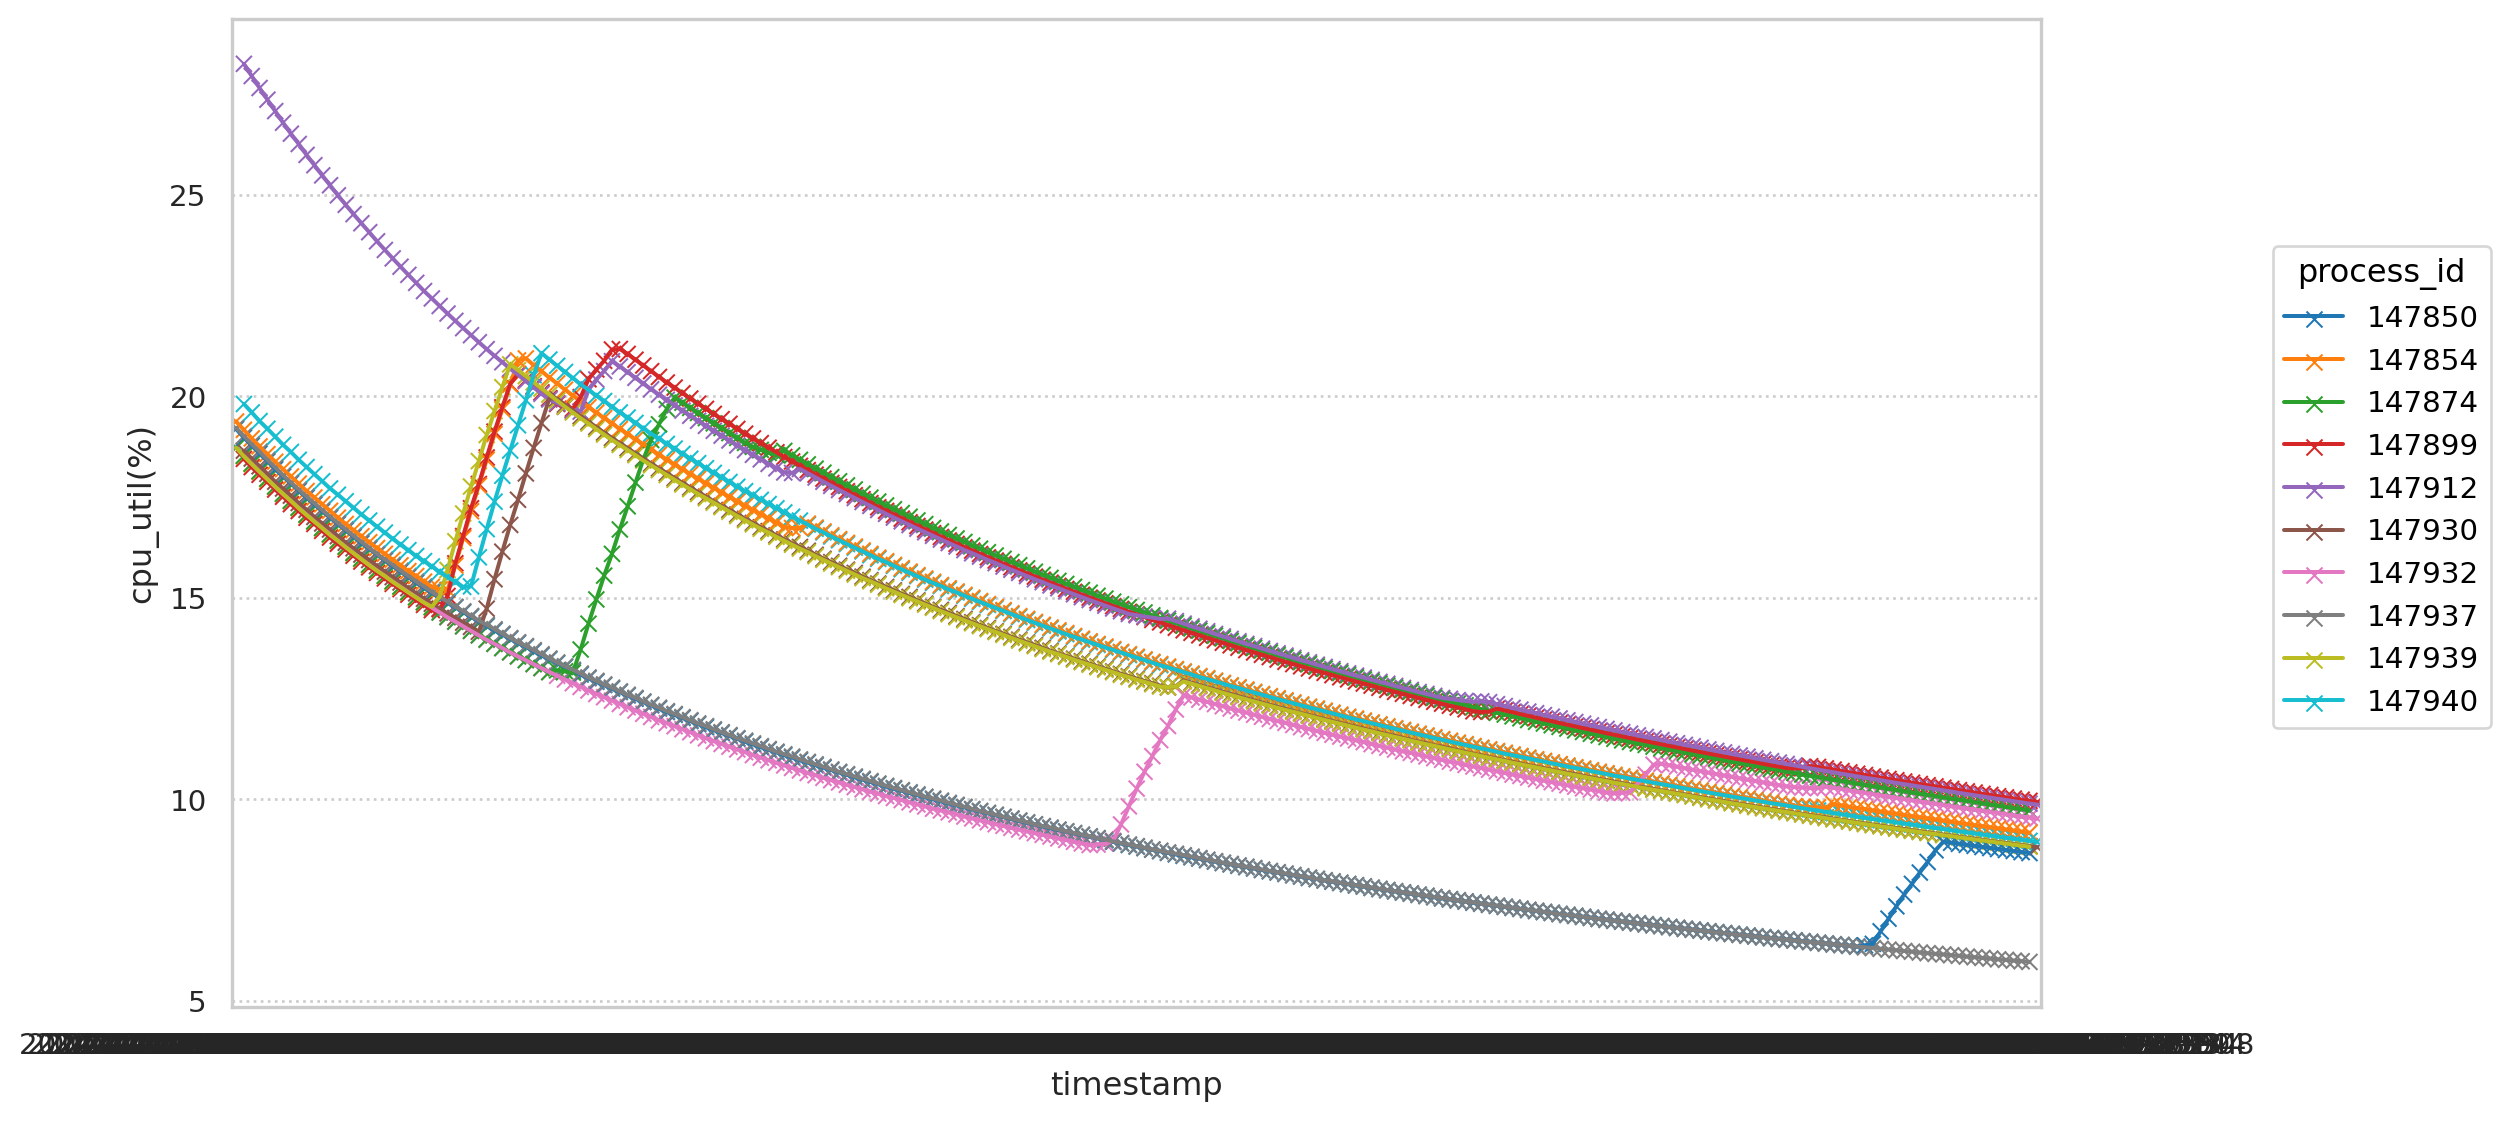

In [31]:
f = plt.Figure(figsize=(12, 6))
(
    so.Plot(
        proc[proc["process_name"]=="python3"][700:3000], x="timestamp", y="cpu_util(%)",
        color="process_id",
    )
    .add(so.Dot(marker="x"))
    .add(so.Line())
    .scale(
        color="tab10")
    .layout(engine="tight")
    .on(f)
)

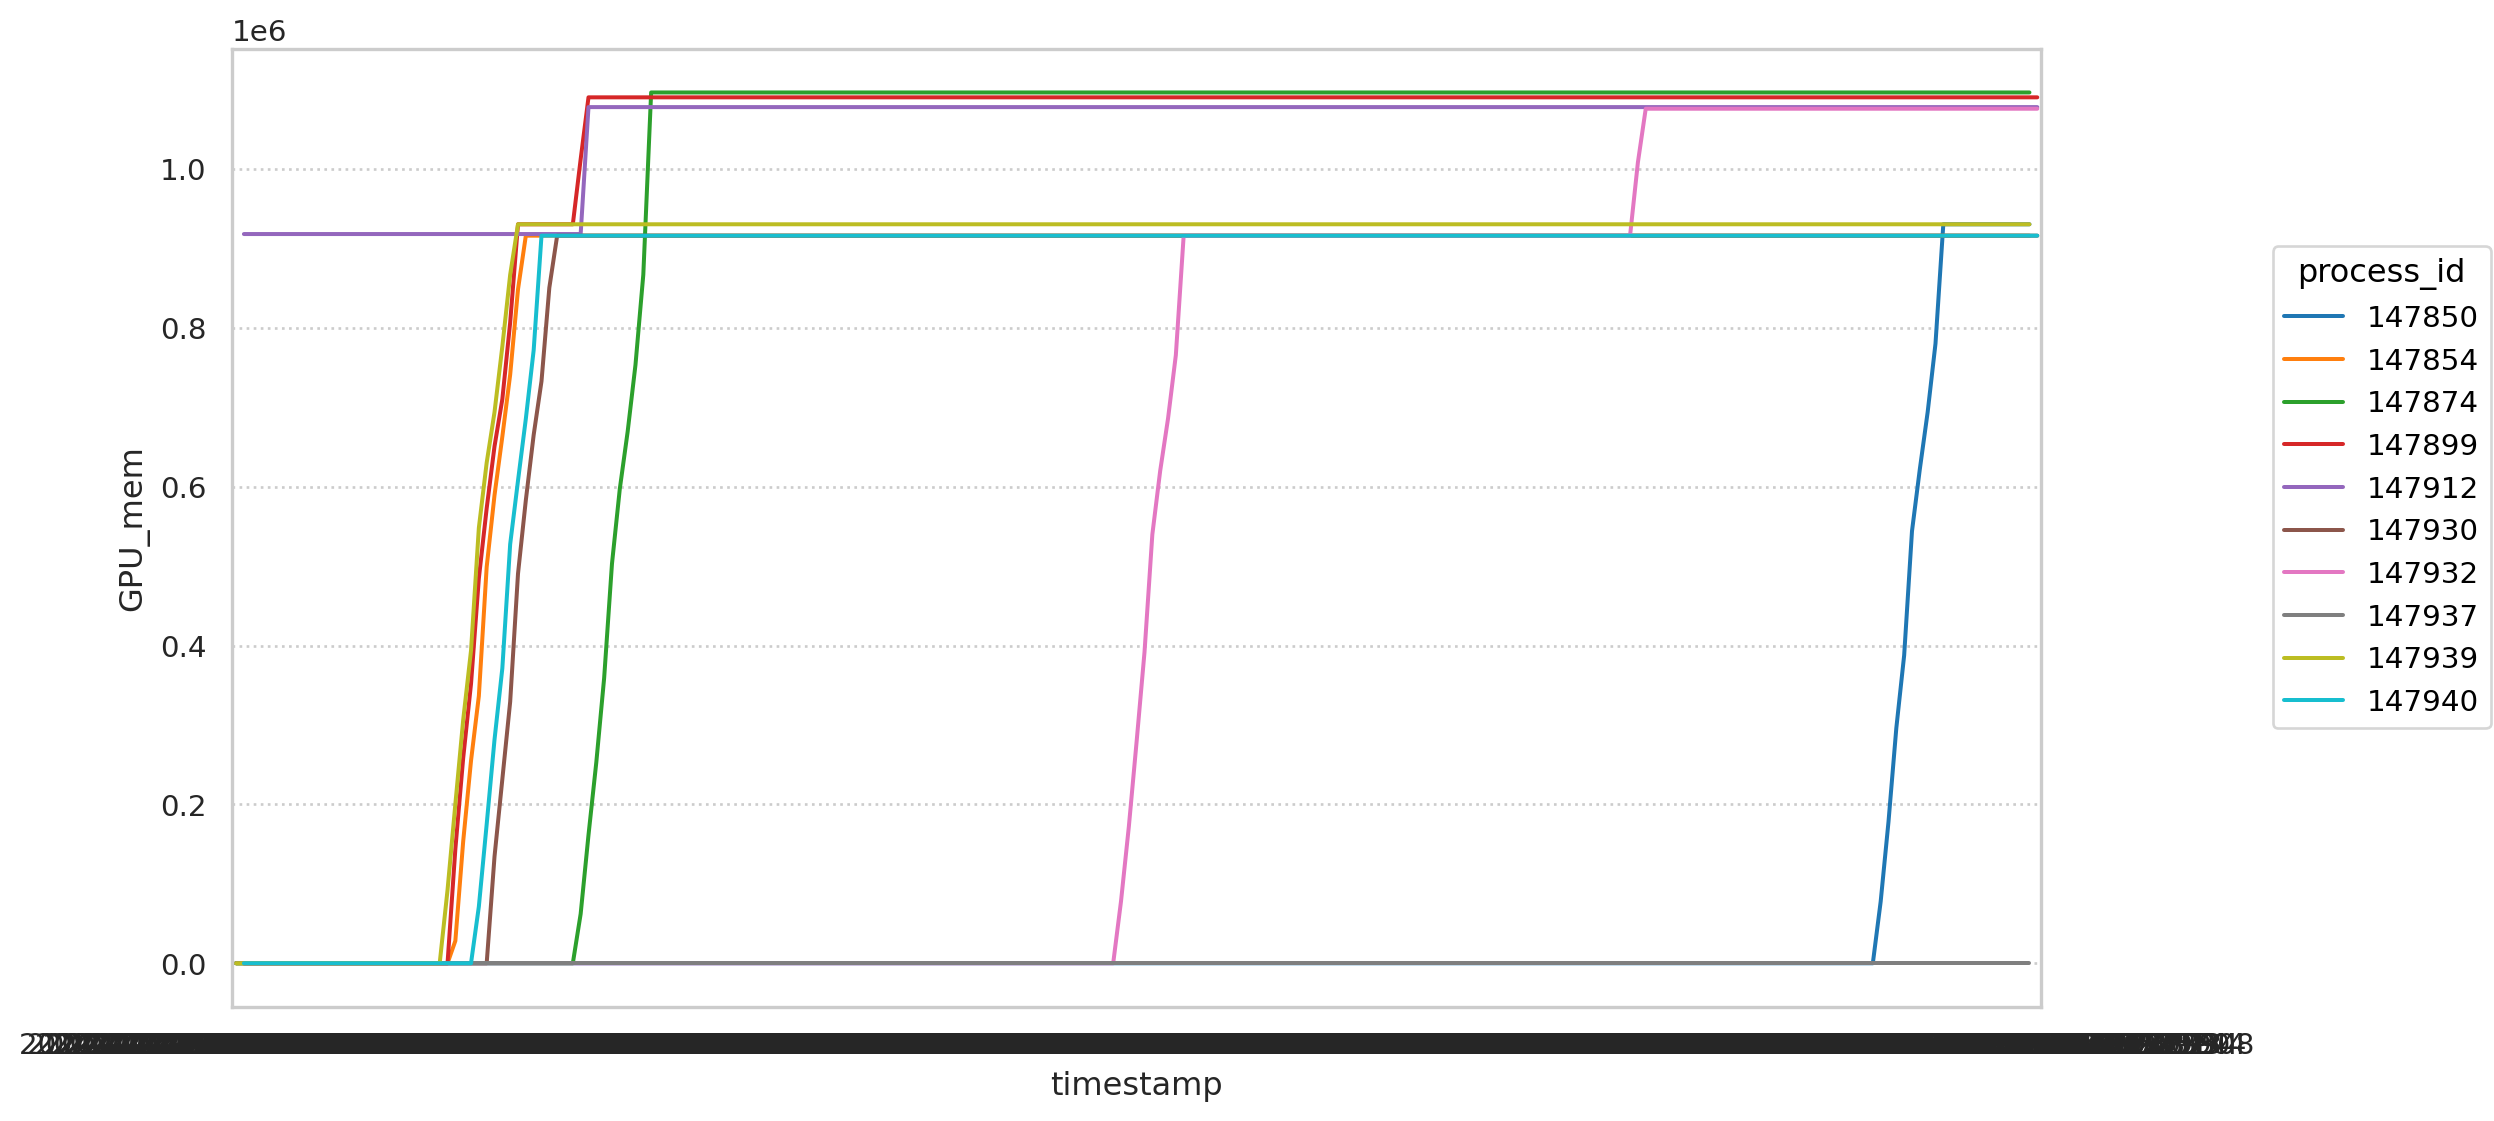

In [35]:
f = plt.Figure(figsize=(12, 6))
(
    so.Plot(
        proc[proc["process_name"]=="python3"][700:3000], x="timestamp", y="GPU_mem",
        color="process_id",
    )
    # .add(so.Dot(marker="x"))
    .add(so.Line())
    .scale(
        color="tab10")
    
    .layout(engine="tight")
    .on(f)
)

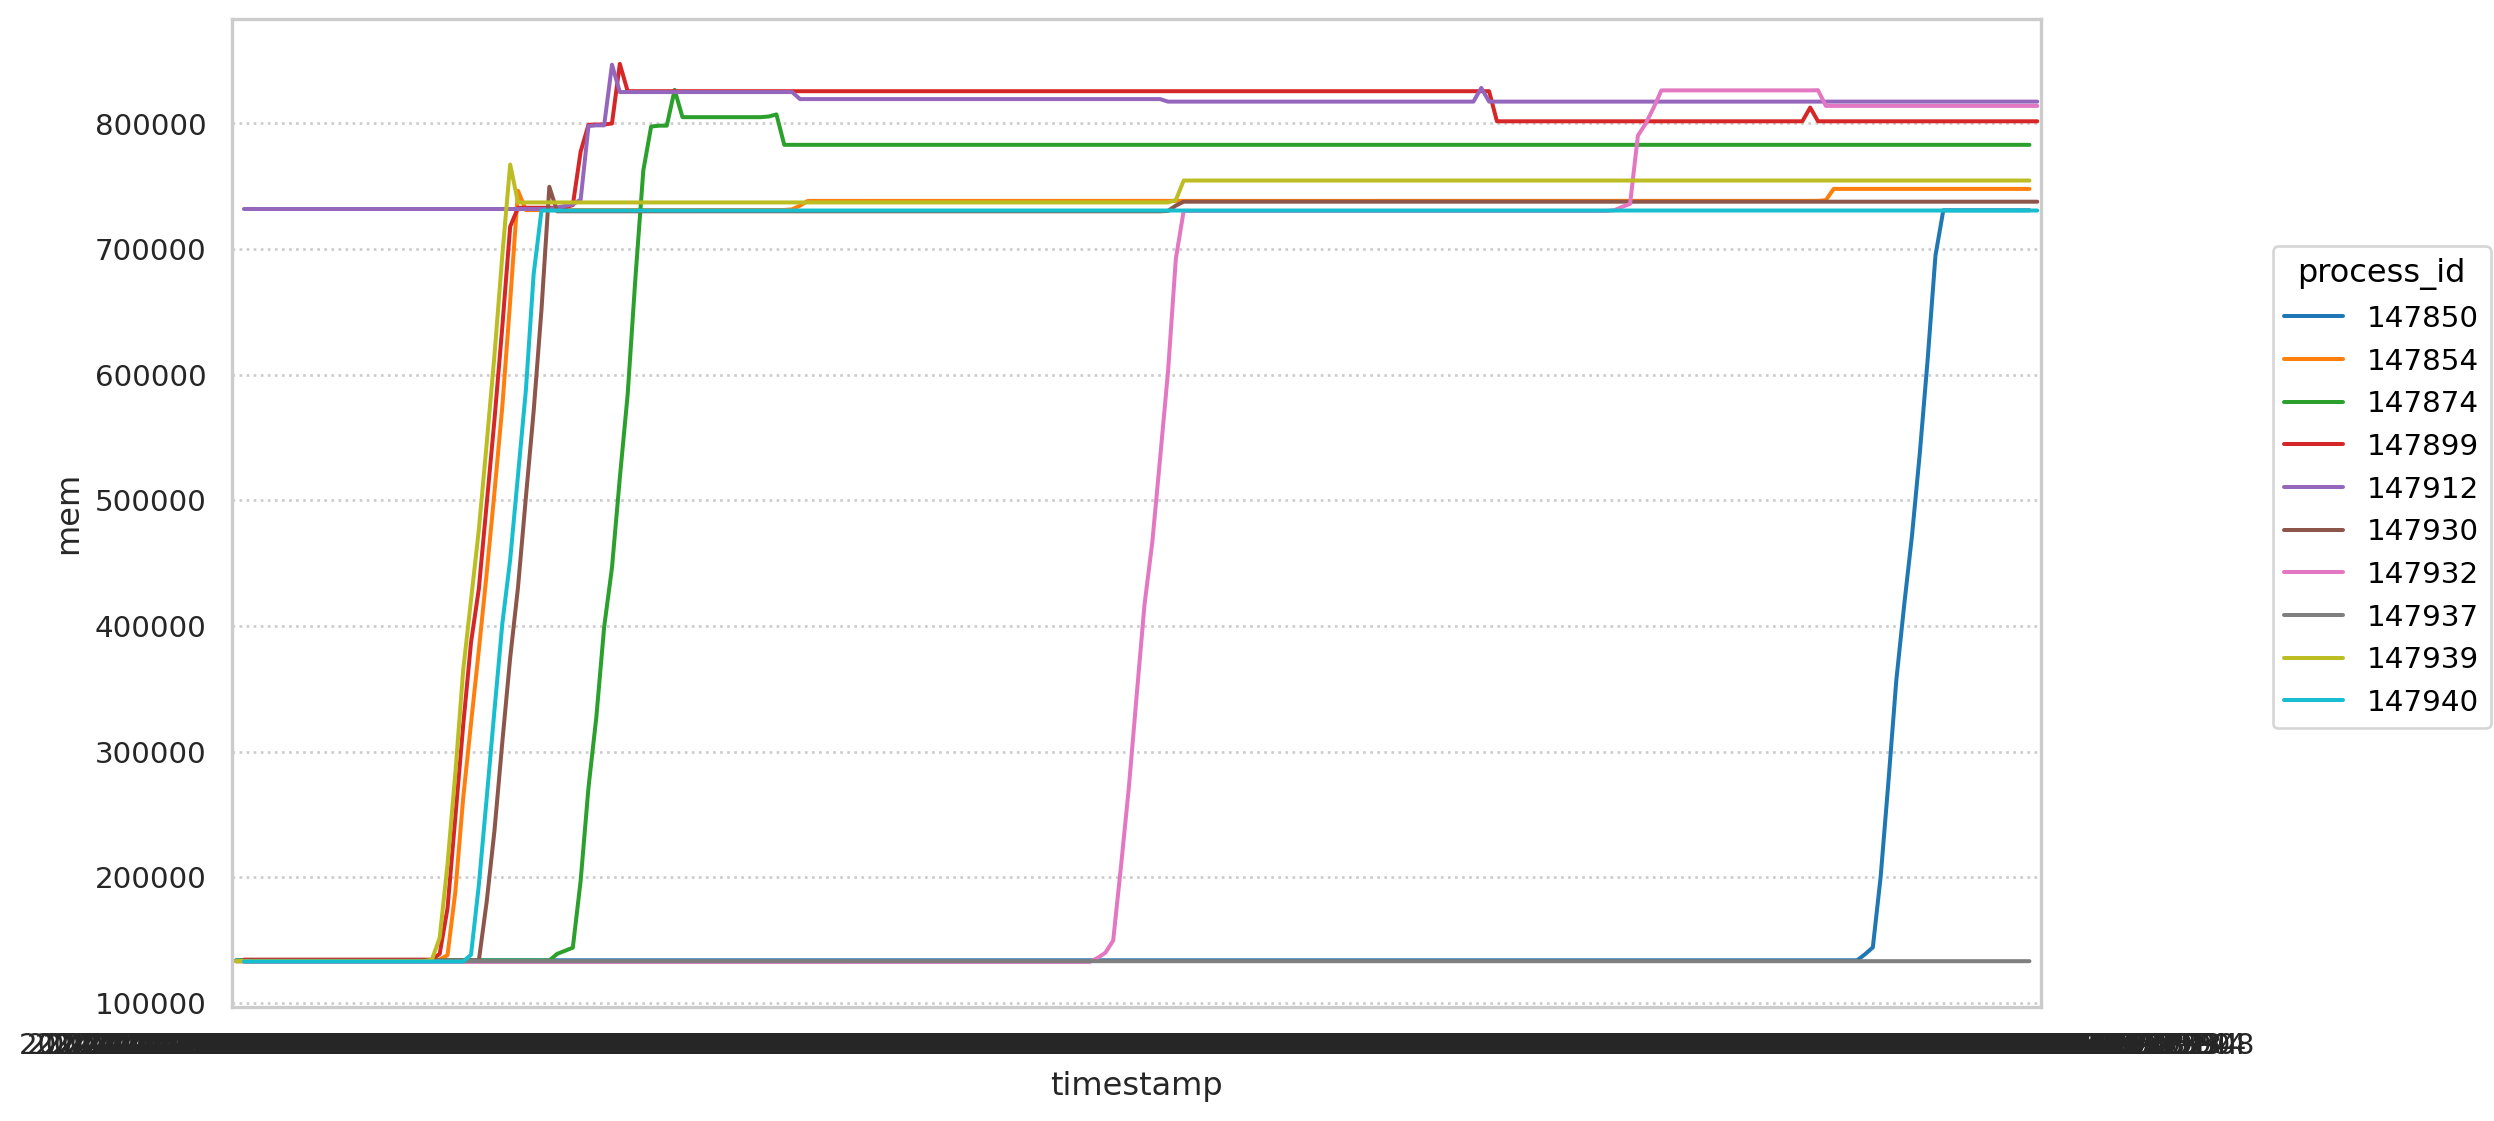

In [34]:
f = plt.Figure(figsize=(12, 6))
(
    so.Plot(
        proc[proc["process_name"]=="python3"][700:3000], x="timestamp", y="mem",
        color="process_id",
    )
    # .add(so.Dot(marker="x"))
    .add(so.Line())
    .scale(
        color="tab10")
    
    .layout(engine="tight")
    .on(f)
)

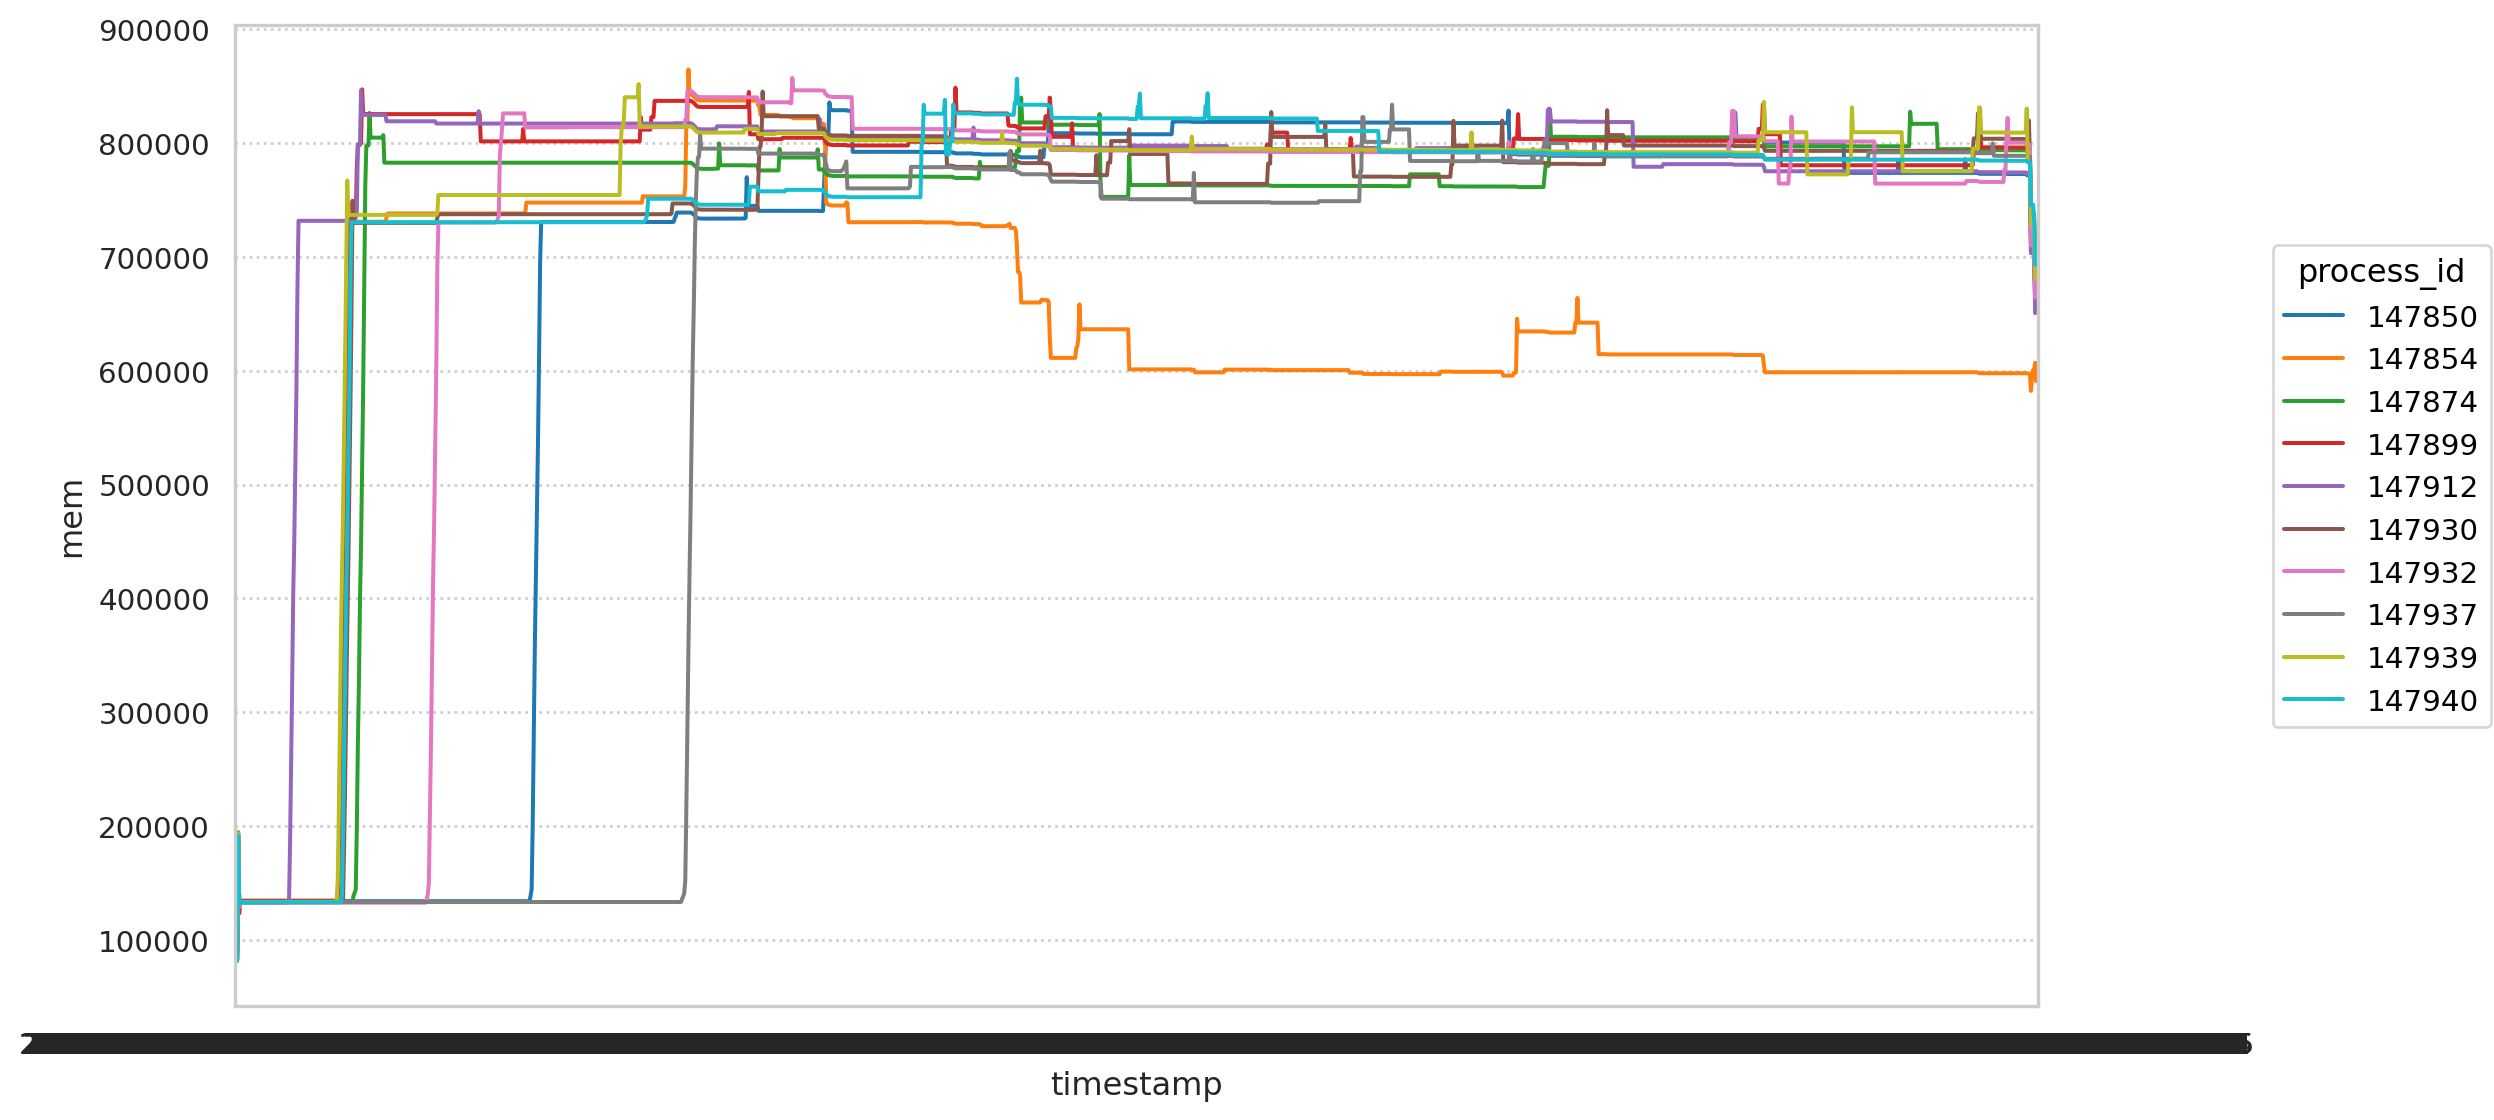

In [29]:
f = plt.Figure(figsize=(12, 6))
(
    so.Plot(
        proc[proc["process_name"]=="python3"], x="timestamp", y="mem",
        color="process_id",
    )
    # .add(so.Dot(marker="x"))
    .add(so.Line())
    .scale(
        color="tab10")
    
    .layout(engine="tight")
    .on(f)
)

GPU_mem semble être la métrique la plus fiable/stable des 3.

In [37]:
df = proc[proc["process_name"]=="python3"][["timestamp", "mem", "process_id"]].merge(energy[["timestamp", "tot inst power (mW)"]])
df

,timestamp,mem,process_id,tot inst power (mW)
0,2024-02-29 17:53:09.114825,81116,147939,17298
1,2024-02-29 17:53:09.114825,81381,147854,17298
2,2024-02-29 17:53:09.114825,82177,147850,17298
3,2024-02-29 17:53:09.114825,81245,147937,17298
4,2024-02-29 17:53:09.114825,81894,147874,17298
...,...,...,...,...
16991,2024-02-29 18:21:29.254046,590837,147854,16545
16992,2024-02-29 18:21:29.254046,660917,147850,16545
16993,2024-02-29 18:21:29.254046,693168,147937,16545
16994,2024-02-29 18:21:29.254046,689523,147874,16545


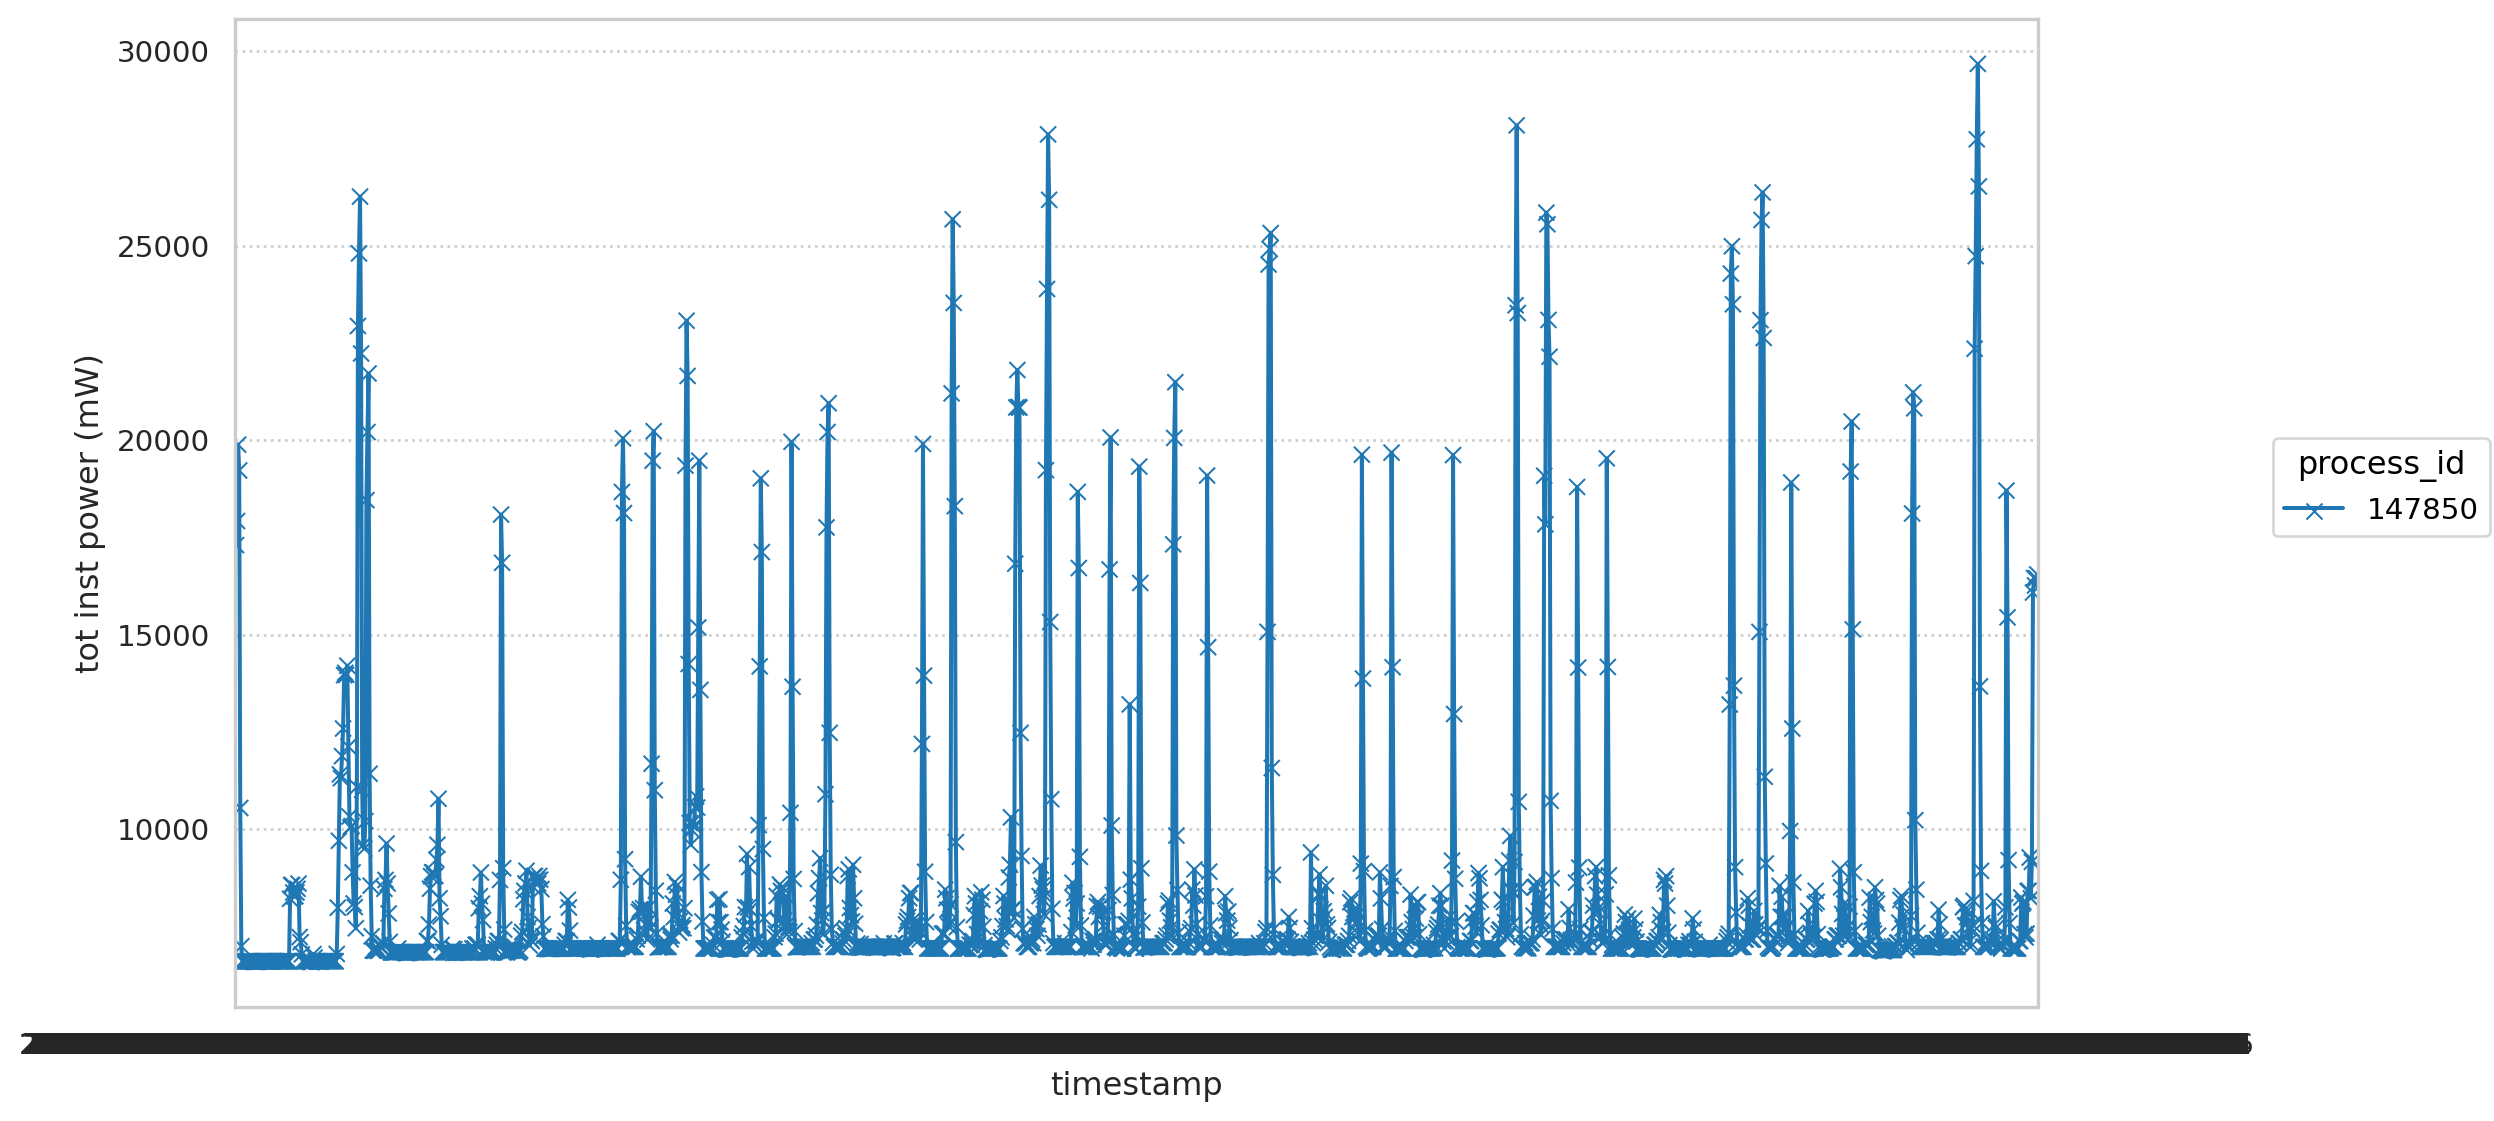

In [15]:
f = plt.Figure(figsize=(12, 6))
(
    so.Plot(
        df[df["process_id"]==147850], x="timestamp", y="tot inst power (mW)",
        color="process_id",
    )
    .add(so.Dot(marker="x"))
    .add(so.Line())
    .scale(
        color="tab10")
    
    .layout(engine="tight")
    .on(f)
)

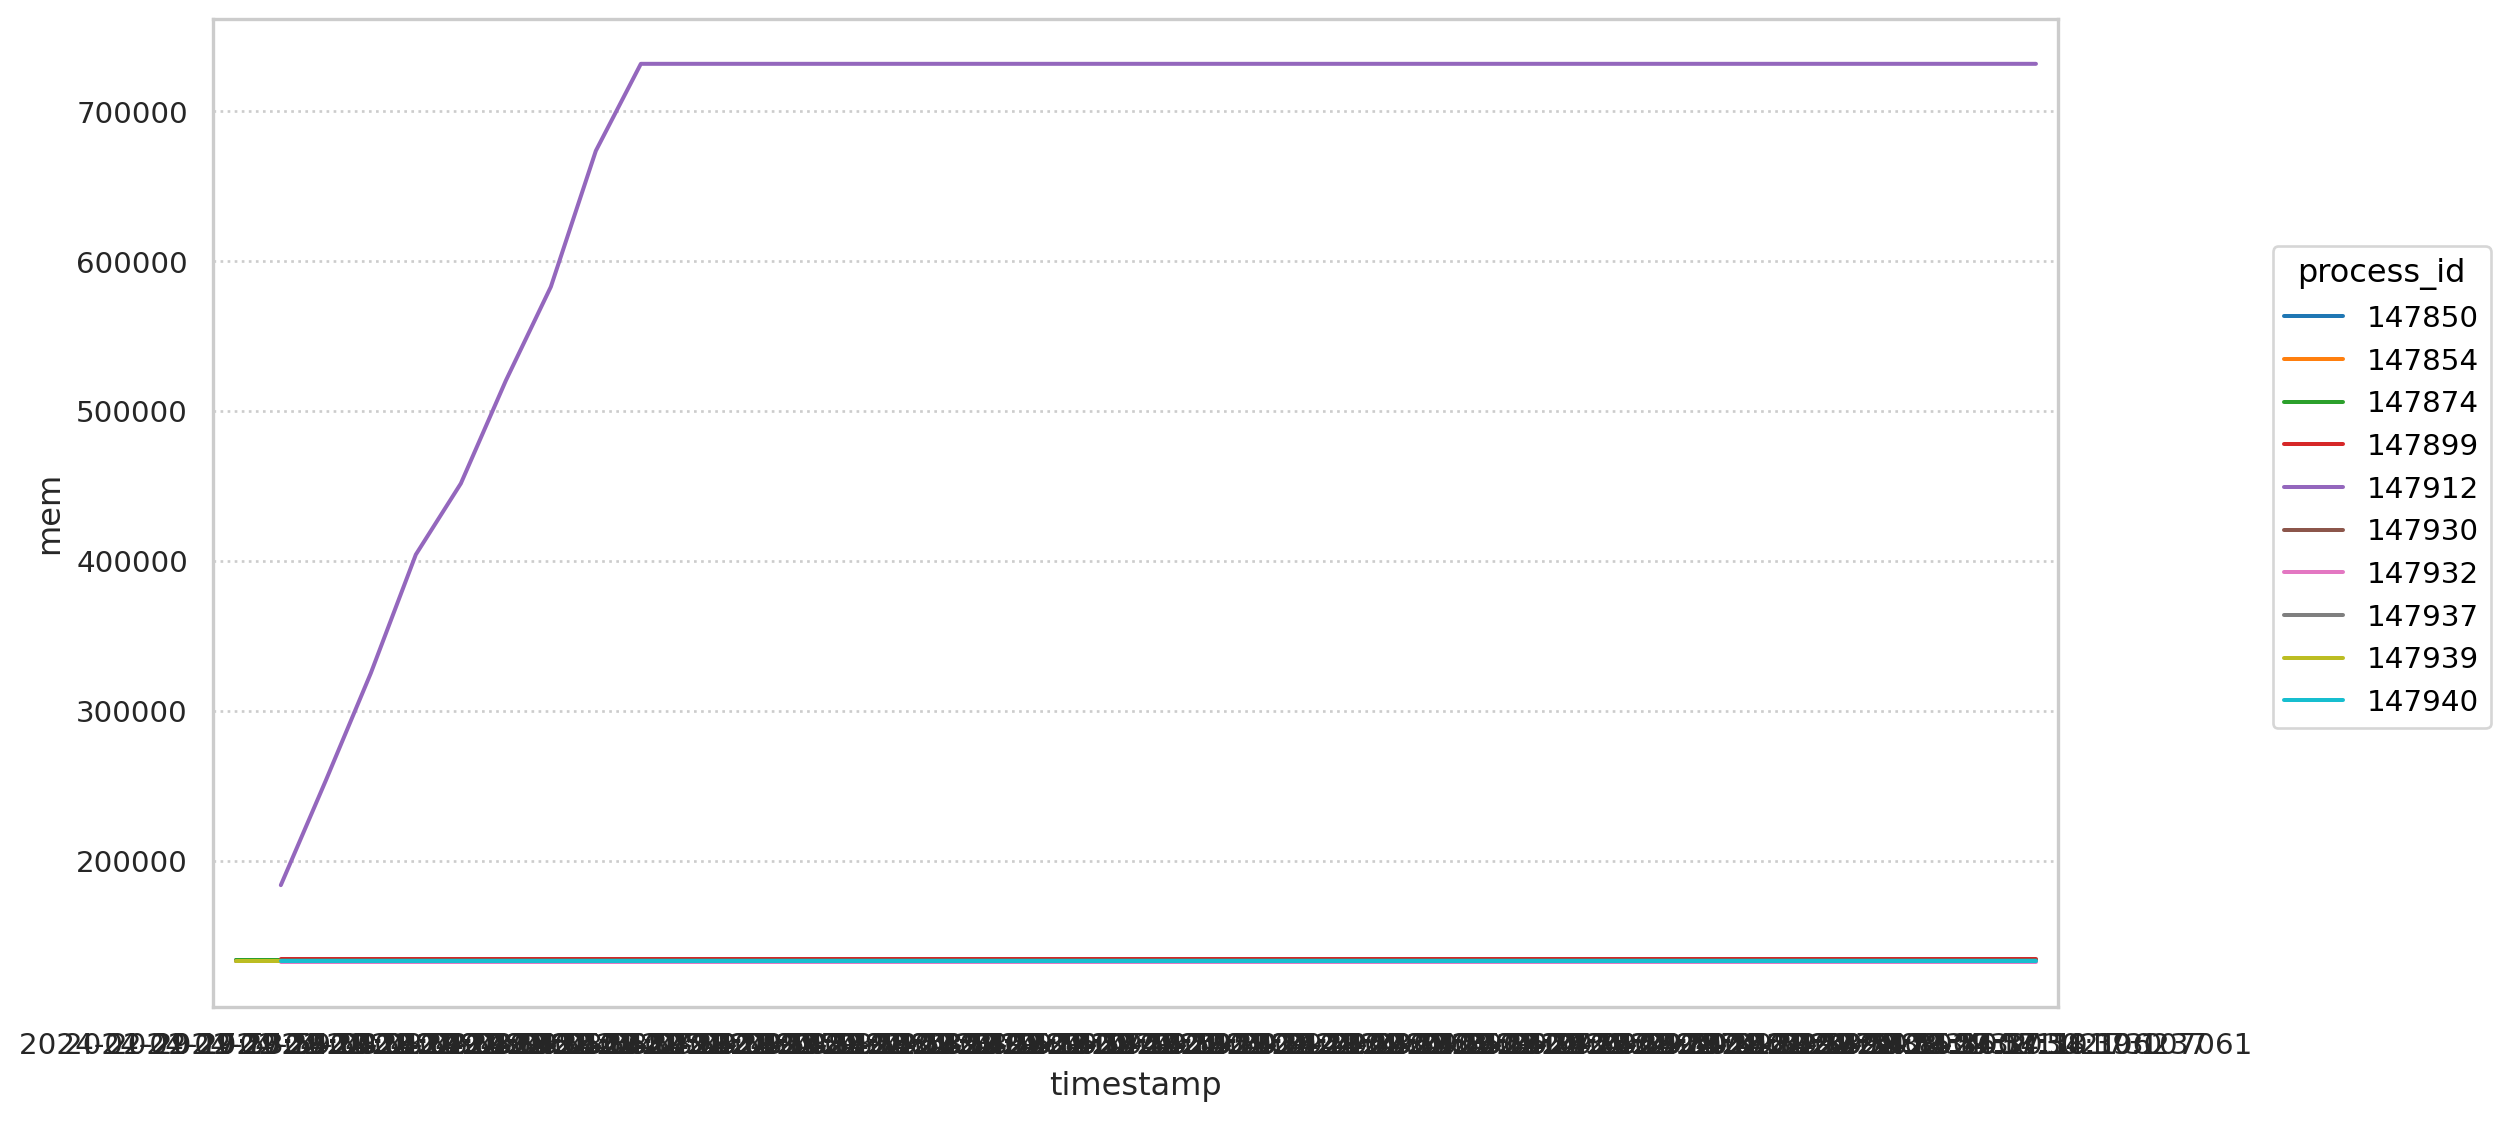

In [44]:
f = plt.Figure(figsize=(12, 6))
(
    so.Plot(
        df[500:900], x="timestamp", y="mem",
        color="process_id",
    )
    # .add(so.Dot(marker="x"))
    .add(so.Line())
    .scale(
        color="tab10")
    
    .layout(engine="tight")
    .on(f)
).plot()

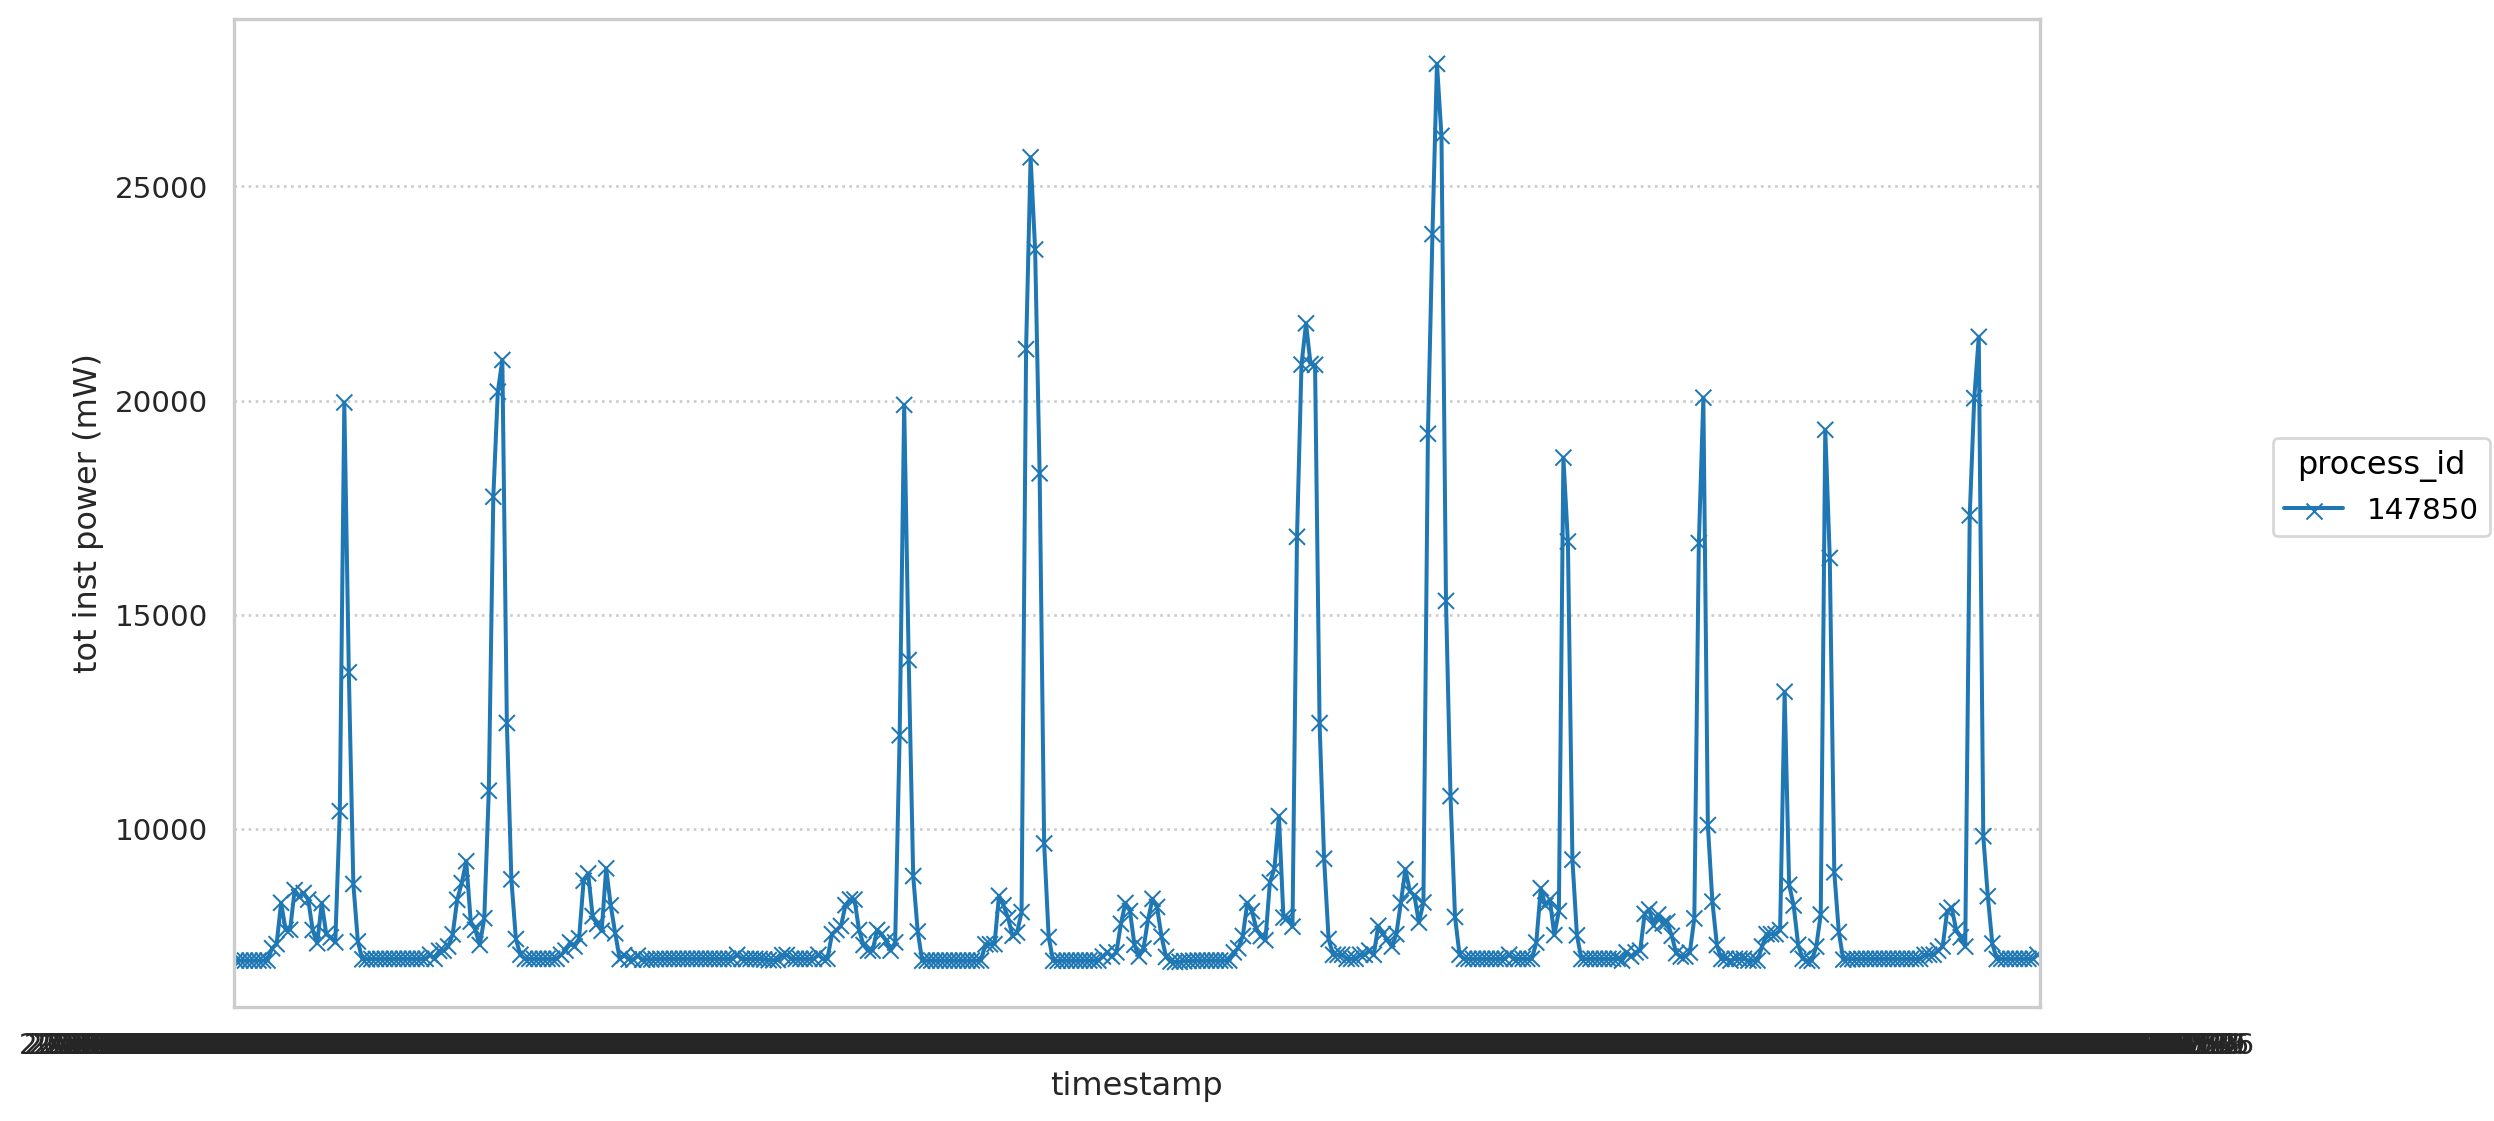

In [45]:
f = plt.Figure(figsize=(12, 6))
(
    so.Plot(
        df[df["process_id"]==147850][500:900], x="timestamp", y="tot inst power (mW)",
        color="process_id",
    )
    .add(so.Dot(marker="x"))
    .add(so.Line())
    .scale(
        color="tab10")
    
    .layout(engine="tight")
    .on(f)
)